#### Collect Resources

In [1]:
from ckanapi import RemoteCKAN
import pprint

data = RemoteCKAN('https://data.gov.ie/', version=3)

packages = data.action.package_show(id="op-waiting-list-by-group-hospital")
resources = packages.get("resources", [])
resource_urls = [el.get('url', '') for el in resources]

#### Create one data frame

In [ ]:
import pandas as pd

resource_dfs = [pd.read_csv(resource_url) for resource_url in resource_urls]
concated_df = pd.concat(resource_dfs)

#### The data source ```data.gov.ie``` does not respond so load data from local

In [60]:
from glob import glob
import pandas as pd

predefined_columns = ['Archive_Date', 'Group', 'Hospital_HIPE', 'Hospital', 'Specialty_HIPE', 'Speciality', 'Adult_Child', 'Age_Profile', 'Time_Bands', 'Total']
csvs_list = glob('data/*')

df_list = [pd.read_csv(file_name) for file_name in csvs_list]
for df in df_list:
    df.columns = predefined_columns
concated_df = pd.concat(df_list).reset_index()
concated_df.Archive_Date = concated_df.Archive_Date.astype('datetime64[Y]')
concated_df.Time_Bands = concated_df.Time_Bands.str.strip().str.replace('18.+', '18 Months+')
concated_df.Age_Profile = concated_df.Age_Profile.str.strip()
concated_df.dropna(axis=0, inplace=True)
concated_df.drop(['index', 'Hospital_HIPE', 'Specialty_HIPE'], inplace=True, axis=1)

#### Summary DF

In [70]:
concated_df.groupby(['Archive_Date', 'Age_Profile', 'Time_Bands']).sum().unstack().unstack()

Total                                                \
Time_Bands   0-3 Months                  12-15 Months                   
Age_Profile        0-15    16-64     65+         0-15   16-64     65+   
Archive_Date                                                            
2014-01-01       283877  1061400  371344        35552  139708   43003   
2015-01-01       279265  1081413  382975        55959  227929   72159   
2016-01-01       259166   965067  352269        55207  197060   61360   
2017-01-01       240349   950652  356869        67782  230767   75701   
2018-01-01       280557  1183431  448095        74831  274285   99424   
2019-01-01       280869  1225798  478907        73491  286408  103764   
2020-01-01        44993   192633   76453        10912   45844   16484   

                                                      ...                     \
Time_Bands   15-18 Months+                18 Months+  ...         3-6 Months   
Age_Profile           0-15   16-64    65+       0-15  ...     65+       0-15   
Archive_Date                                          ...                      
2014-01-01           16047   65101  19724      10880  ...   19747     169324   
2015-01-01           33264  138621  43186      25907  ...   46763     168108   
2016-01-01           29114  111815  33898      19488  ...   29093     161755   
2017-01-01           49715  164493  53182      83885  ...  103571     156671   
2018-01-01           60181  208572  76320     183710  ...  212973     173891   
2019-01-01           59129  216742  79921     208019  ...  287623     176670   
2020-01-01            8812   37102  14364      32438  ...   50610      27054   

                                                                             \
Time_Bands                   6-9 Months                 9-12 Months           
Age_Profile    16-64     65+       0-15   16-64     65+        0-15   16-64   
Archive_Date                                                                  
2014-01-01    620110  199387     108723  426741  131435       68551  284911   
2015-01-01    626714  203516     116849  455584  141859       84472  344525   
2016-01-01    555422  186789     109641  393135  126227       82168  292661   
2017-01-01    561583  196929     107856  404914  138029       86585  321739   
2018-01-01    672312  241203     123094  470690  168330       93069  360277   
2019-01-01    717217  267430     126196  517077  187182       94231  389719   
2020-01-01    123381   47226      20806   89224   34723       17238   70296   

                      
Time_Bands            
Age_Profile      65+  
Archive_Date          
2014-01-01     86235  
2015-01-01    108126  
2016-01-01     93422  
2017-01-01    107760  
2018-01-01    130391  
2019-01-01    141592  
2020-01-01     24839  

[7 rows x 21 columns]

#### Plot Summaries

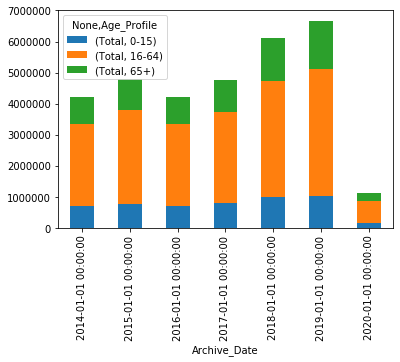

In [68]:
concated_df.groupby(['Archive_Date', 'Age_Profile']).sum().unstack().plot(kind='bar', stacked=True)

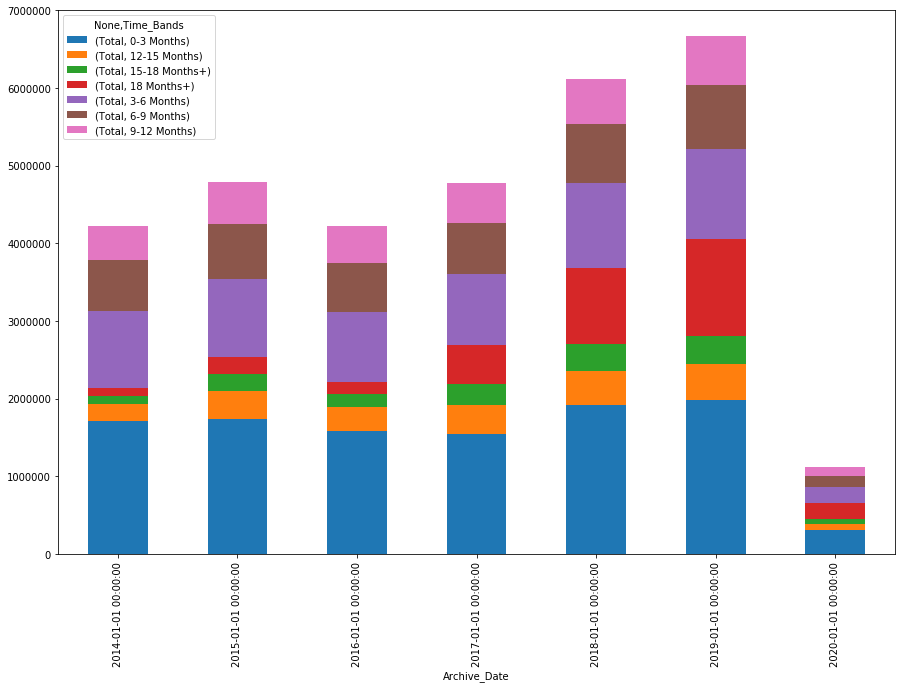

In [53]:
concated_df.groupby(['Archive_Date', 'Time_Bands']).sum().unstack().plot(kind='bar', stacked=True, figsize=(15, 10))

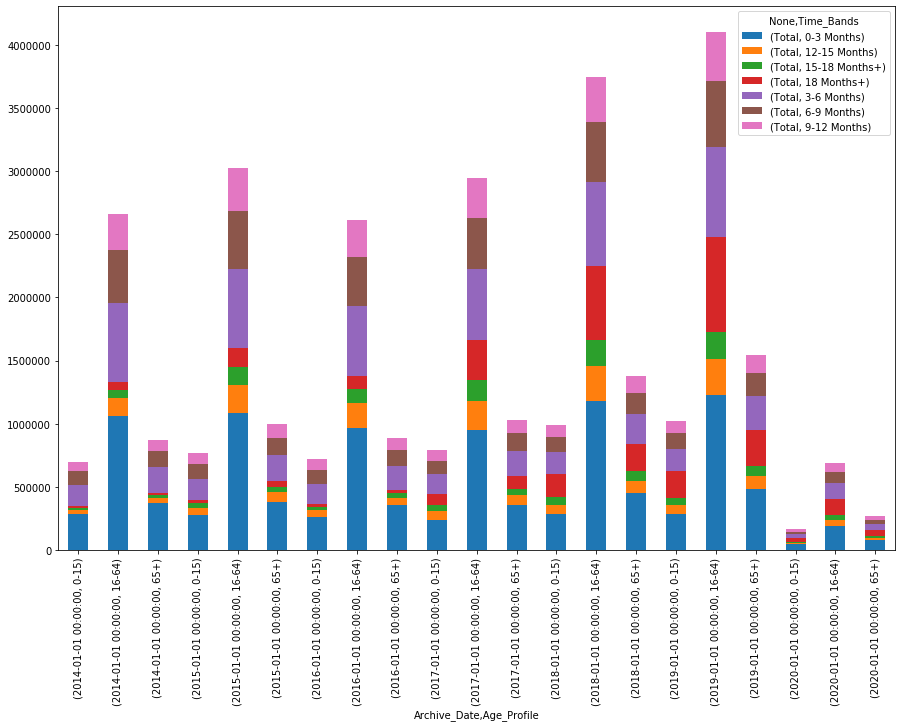

In [55]:
concated_df.groupby(['Archive_Date', 'Age_Profile', 'Time_Bands']).sum().unstack().plot(kind='bar', stacked=True, figsize=(15, 10))